In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
#importing the data set 
data = pd.read_csv("red_wine_dataset.csv")
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#checking the columns
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
#Checking null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see there are no null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Correlation
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

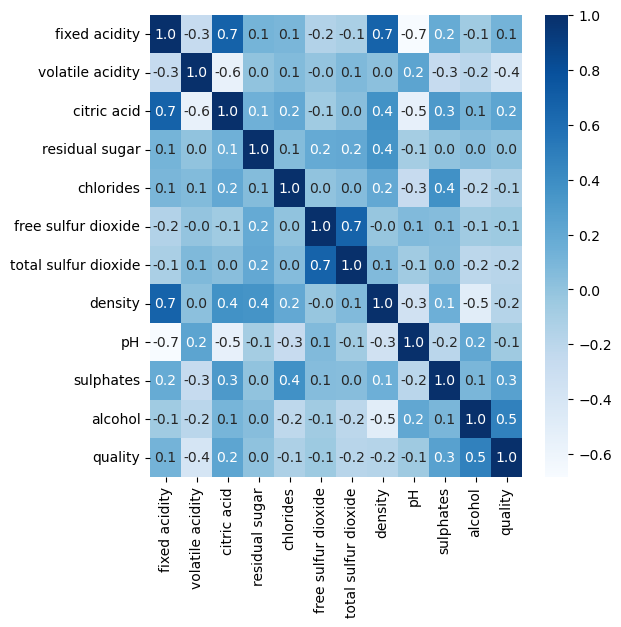

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,cmap="Blues",fmt=".1f")

From the above heatmap we can see the "volatile acidity" is negatively correlated and the "alcohol" is positively correlated to the quality of the wine

In [8]:
#Describe the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above table we can see that the mean of total "total sulfur dioxide" is 46.467792 and the standard deviation is 32.895324 also the maximum value is 289.000000 it means this columns contains some outliers.

## EDA

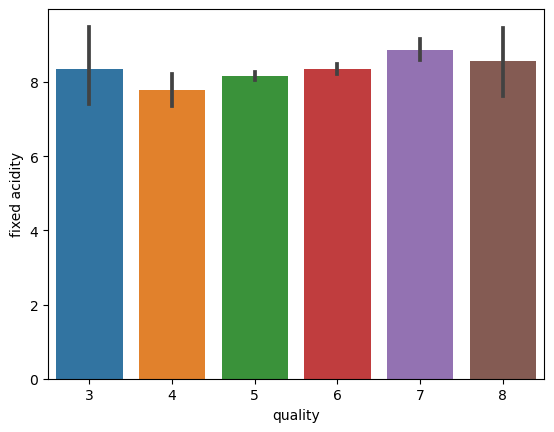

In [9]:
#quality v/s fixed acidity
sns.barplot(x="quality", y= "fixed acidity" ,data = data)
plt.show()

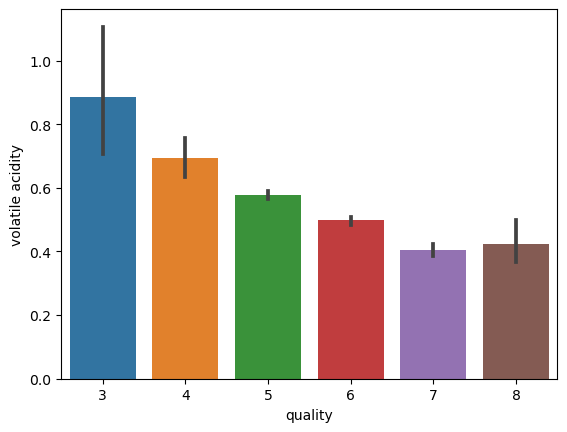

In [10]:
# quality v/s volatile acidity
sns.barplot("quality", "volatile acidity" ,data = data)
plt.show()

There is a decrease in the quaity as the volatile acidity decreases.

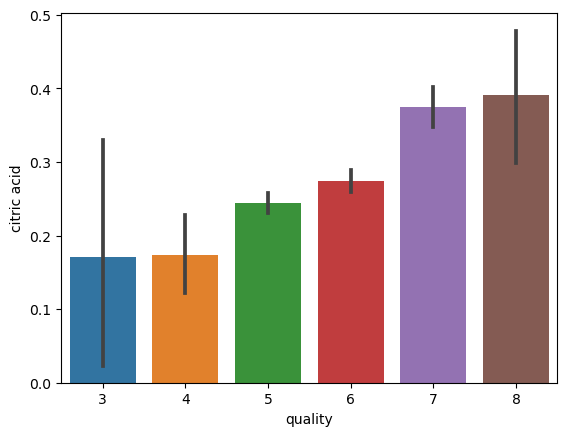

In [11]:
# quality v/s citric acid
sns.barplot("quality", "citric acid" ,data = data)
plt.show()

The quality of the wine increases as the citric acid increases.

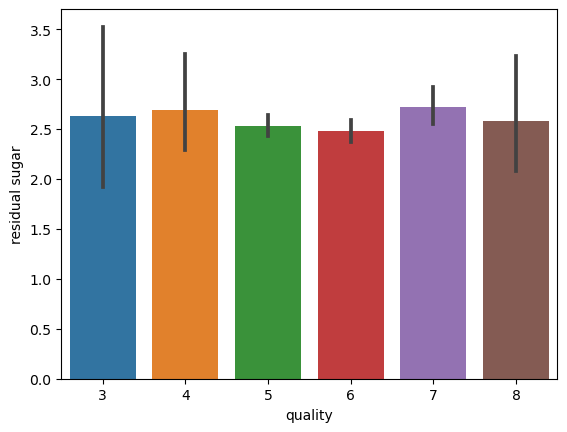

In [12]:
sns.barplot("quality","residual sugar",data = data)
plt.show()

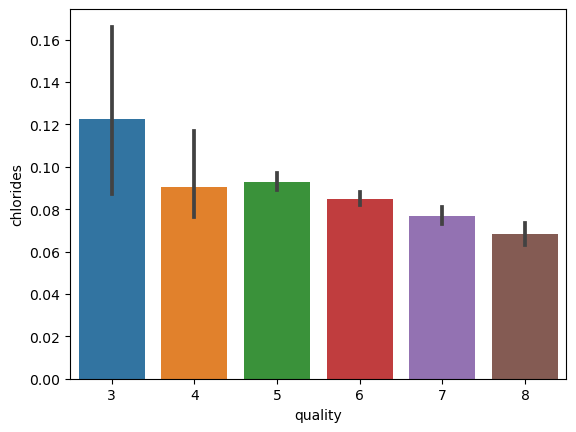

In [13]:
# quality v/s chlorides
sns.barplot("quality", "chlorides" , data = data)
plt.show()

Here as the chlorides decreases the quality of the wine increases.

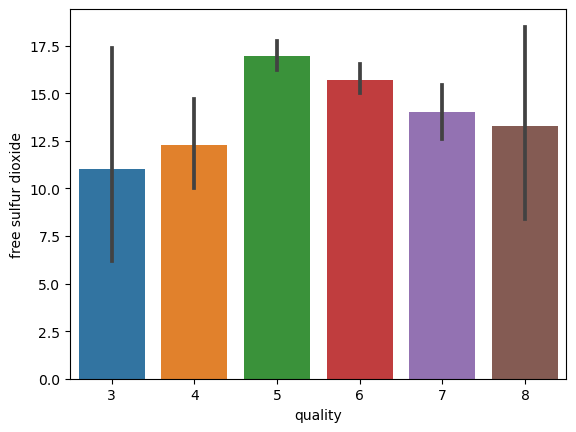

In [14]:
# quality v/s free sulfur dioxide
sns.barplot("quality","free sulfur dioxide", data = data)
plt.show()

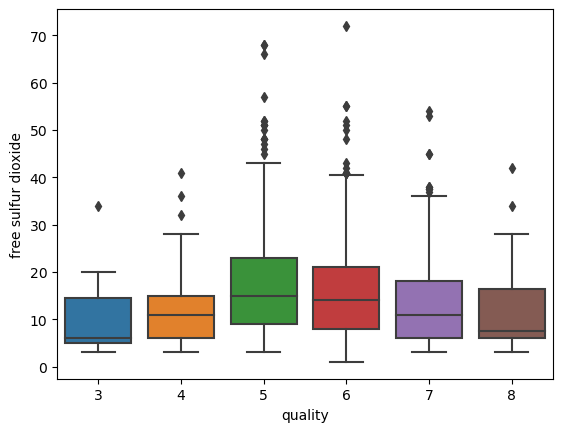

In [15]:
#Checking the outliers
sns.boxplot(x= "quality", y ="free sulfur dioxide", data = data)
plt.show()

Here The outliers are present

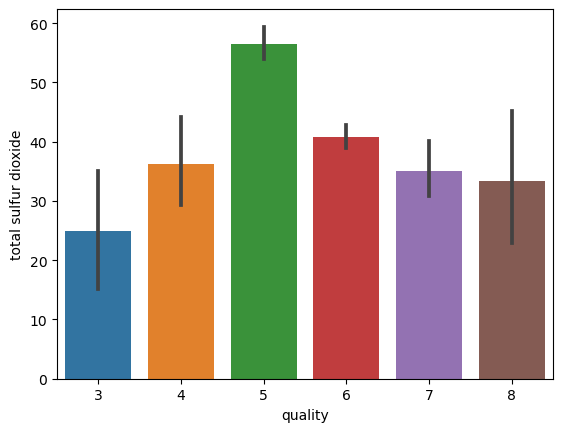

In [16]:
# quality v/s total sulfur dioxide
sns.barplot("quality","total sulfur dioxide", data = data)
plt.show()

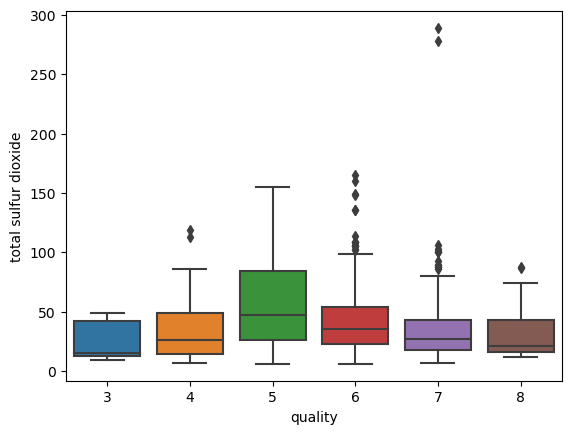

In [17]:
#as we seen earlier may be there are some outliers present in total sulfur dioxide
#Checking the outliers using boxplot
sns.boxplot(x= "quality", y ="total sulfur dioxide", data = data)
plt.show()

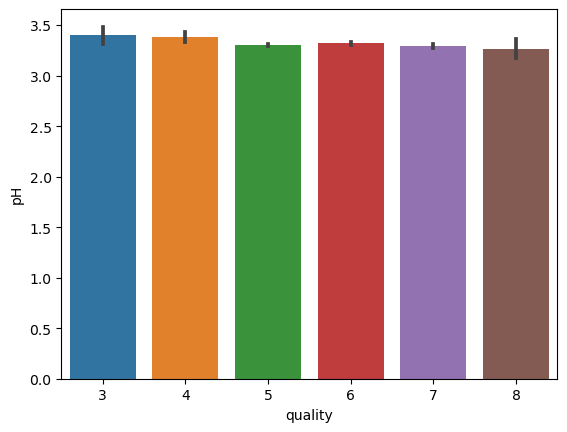

In [18]:
#quality v/s pH
sns.barplot("quality", "pH", data = data)
plt.show()

As we can see here is a very small increase in the quality as the pH decreases.


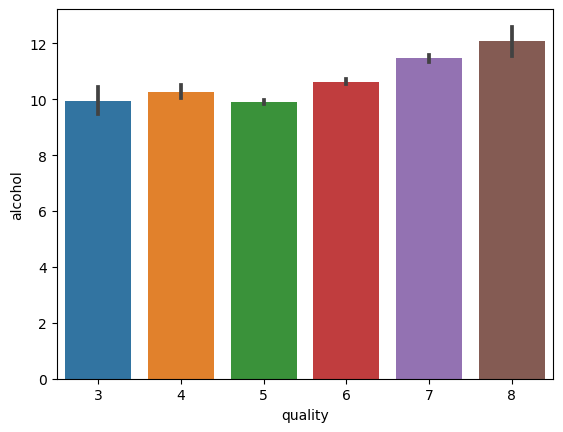

In [19]:
# quality v/s alcohol
sns.barplot("quality","alcohol", data = data)
plt.show()

Here is a small increases in the quality as the alcohol increases.

In [20]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

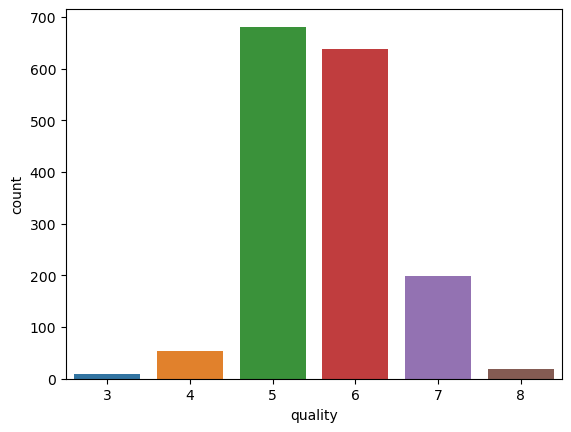

In [21]:
sns.countplot("quality",data = data )

as we can see the quantity of the 5,6 and 7 is very large as compare to the others.

The data is imbalanced.

## Removing the outliers

In [22]:
from scipy.stats import zscore
z = zscore(data)
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [23]:
#Outliers
Threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        163,  164,  169,  169,  181,  199,  226,  226,  240,  243,  244,
        258,  258,  274,  281,  291,  324,  325,  339,  340,  347,  354,
        374,  381,  391,  396,  396,  400,  400,  442,  442,  451,  467,
        480,  480,  494,  515,  544,  554,  554,  555,  555,  557,  557,
        568,  584,  588,  591,  595,  608,  614,  636,  639,  649,  649,
        651,  652,  652,  652,  672,  672,  684,  690,  692,  692,  695,
        723,  724,  730,  754,  776,  777,  795,  821,  889,  911,  917,
        923,  925,  926,  982, 1043, 1051, 1051, 1071, 1074, 1079, 1079,
       1081, 1081, 1111, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1270, 1288, 1289, 1295, 1296, 1299, 1300,
       1312, 1316, 1319, 1319, 1321, 1358, 1367, 1

In [24]:
new_data = data[(z<3).all(axis=1)]
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
print(data.shape)
print(new_data.shape)

(1599, 12)
(1463, 12)


Here the outliers are removed.

In [26]:
# we have imbalanced data of target variable 
# we can change the target variable into the binary classification
#1 = good wine and 0 = bad wine
new_data["quality"]=new_data["quality"].apply(lambda m : 1 if m>=7 else 0 )

In [27]:
new_data["quality"].value_counts()

0    1260
1     203
Name: quality, dtype: int64

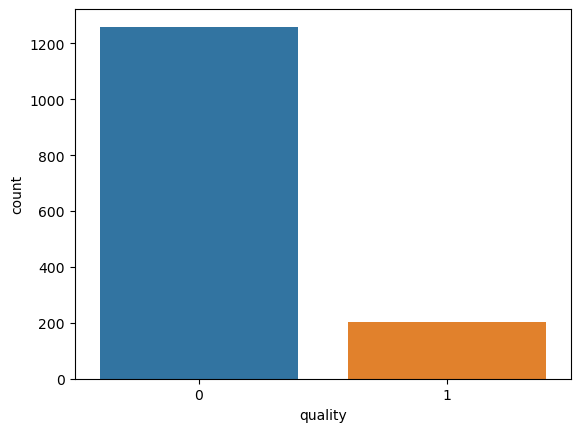

In [28]:
sns.countplot(new_data["quality"])
plt.show()

Here the data is devides into good and bad quality of the wine.

In [29]:
#seperating the input and the out of the new_data
x = new_data.iloc[:,:-1]
y =new_data.iloc[:,-1]

Hence the data is seperated, x as input and y as output

In [30]:
# skewness of the data
x.skew()

fixed acidity           0.819287
volatile acidity        0.387626
citric acid             0.288871
residual sugar          2.430731
chlorides               2.212135
free sulfur dioxide     0.862879
total sulfur dioxide    1.170933
density                -0.077017
pH                      0.086362
sulphates               0.882415
alcohol                 0.758634
dtype: float64

In [31]:
x.skew()

fixed acidity           0.819287
volatile acidity        0.387626
citric acid             0.288871
residual sugar          2.430731
chlorides               2.212135
free sulfur dioxide     0.862879
total sulfur dioxide    1.170933
density                -0.077017
pH                      0.086362
sulphates               0.882415
alcohol                 0.758634
dtype: float64

In [32]:
#removing the skewness
x['chlorides'] = np.log(x['chlorides'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

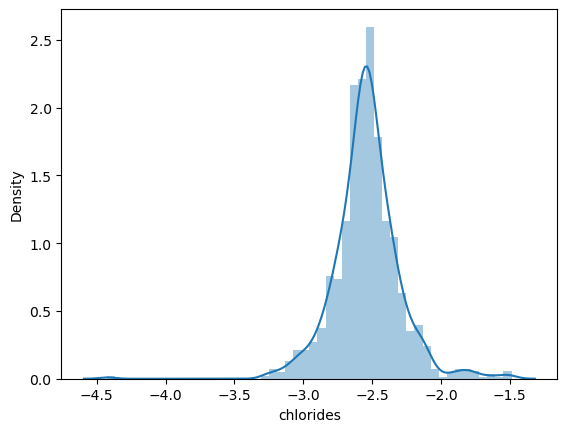

In [33]:
sns.distplot(x['chlorides'])

In [34]:
x['residual sugar'] = np.log(x['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

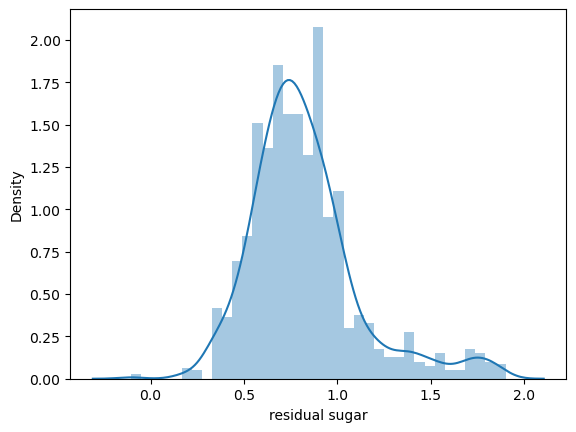

In [35]:
sns.distplot(x['residual sugar'])

In [36]:
x['total sulfur dioxide'] = np.log(x['total sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

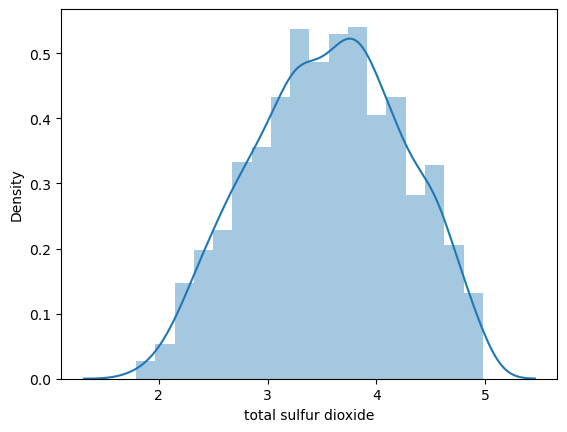

In [37]:
sns.distplot(x['total sulfur dioxide'])

In [38]:
x.skew()

fixed acidity           0.819287
volatile acidity        0.387626
citric acid             0.288871
residual sugar          1.171237
chlorides              -0.158829
free sulfur dioxide     0.862879
total sulfur dioxide   -0.097906
density                -0.077017
pH                      0.086362
sulphates               0.882415
alcohol                 0.758634
dtype: float64

In [39]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
stdz=StandardScaler()
stdz.fit(x)
x_data=stdz.transform(x)
x_data=pd.DataFrame(x_data,columns=x.columns)

## Train Test Split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.33, random_state = 43)


In [41]:
print("Training Data")
print(x_train.shape)
print(y_train.shape)
print("Testing Data")
print(x_test.shape)
print(y_test.shape)

Training Data
(980, 11)
(980,)
Testing Data
(483, 11)
(483,)


## Mode Building

In [42]:
#Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [43]:
models  = {
    "LogisticRegression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVC":SVC(),
}
for i in range(len(list(models))):
  #training the model
    model = list(models.values())[i]
    model.fit(x_train,y_train)
  #prediction   
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
  #training performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
  #testing performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("* Model performace for training set")
    print("Accuracy Score :",model_train_accuracy)
    print("roc_auc_score : ",model_train_roc_auc_score)
    
    
    print("\n")
    print("* Model performace for testing set ")
    print("Accuracy Score :",model_test_accuracy)
    print("roc_auc_score : ",model_test_roc_auc_score)
    print("Confusion matrix \n",confusion_matrix(y_test,y_test_pred))
    
    print(" --------------------------------------------------- ")
    print("\n")

LogisticRegression
* Model performace for training set
Accuracy Score : 0.8887755102040816
roc_auc_score :  0.6663766007740862


* Model performace for testing set 
Accuracy Score : 0.8695652173913043
roc_auc_score :  0.6247547416612166
Confusion matrix 
 [[401  16]
 [ 47  19]]
 --------------------------------------------------- 


Random Forest
* Model performace for training set
Accuracy Score : 1.0
roc_auc_score :  1.0


* Model performace for testing set 
Accuracy Score : 0.9047619047619048
roc_auc_score :  0.7152823195988663
Confusion matrix 
 [[407  10]
 [ 36  30]]
 --------------------------------------------------- 


Decision Tree
* Model performace for training set
Accuracy Score : 1.0
roc_auc_score :  1.0


* Model performace for testing set 
Accuracy Score : 0.9006211180124224
roc_auc_score :  0.776651406147809
Confusion matrix 
 [[395  22]
 [ 26  40]]
 --------------------------------------------------- 


SVC
* Model performace for training set
Accuracy Score : 0.8602040

Here we can see the random forest classifier performing good.

In [44]:
#savinf the best model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.20,)
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [45]:
import joblib

In [46]:
joblib.dump(rfc,"RandomforestClassifier_model_wine.obj")

['RandomforestClassifier_model_wine.obj']